### Objective:- Car Price Prediction using Machine Learning.
Description
- The price of a car depends on a lot of factors like the goodwill of the brand of the car,features of the car, horsepower and the mileage it gives and many more.
- Car price prediction is one of the major research areas in machine learning.
- In this assignment we have to train a machine learning model which will predict the price of cars using the given features of car.
- Dataset Link:- https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv

### Importing Libraries

##### Data Analysis library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

##### Machine learning library and performance metrices

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Loading Datasets

In [3]:
df = pd.read_csv('CarPrice_Prediction.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
11,12,0,bmw 320i,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925.0
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
34,35,1,honda civic cvcc,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0
179,180,3,toyota corona,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.3,161,5200,19,24,15998.0


### Basic Understanding of Data

##### Checking Dimensions of the Data:-

In [7]:
df.shape

(205, 26)

##### From the above output we can say that there are **205** rows/records and **26** columns/Features present in our dataset.

##### Checking the basic information of dataset:-

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### From above output we can observe that **10** categorical & **16** numerical Attributes.
##### All the features are having correct data-types. So we don't have to do any changes.

##### Descriptive Statistics Analysis:-

In [9]:
df.describe(include=["int64","float64"]).T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [10]:
df.describe(include=["object"]).T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


##### Checking NaN values in our Dataset:-

In [11]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


##### We can observe that none of the features is having Missing values

##### Checking Duplicate Values:-

In [12]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


##### From the above output we can say that there is no duplicate records present in our dataset.

##### Showing Only Categorical Features:-

In [13]:
df.select_dtypes(include="object").head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


##### Showing only the Numerical Features:-

In [14]:
df.select_dtypes(include=["int","float"]).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Cleaning

##### Cleaning the CarName Feature:-

In [15]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- In the CarName Feature we can observe that the values are storing both the car's company name and the Car name.
- So we have to clean that Feature.
- We can separate the car company names from Carname Feature.

In [16]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)

# Now we can drop the CarName Feature.
df.drop(columns=["CarName"],inplace=True)

In [17]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### Checking the Unique Car Company Names:-

In [18]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There seems to be some spelling error in the CompanyName column.

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

So we have to replace those incorrect car company names wit correct company's name.

In [19]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [20]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

- Now all the car company name seems correct.So we don't need to do any more cleaning.
- Now we can go to next step which is exploratory data analysis.

### Exploratory Data Analysis (EDA)

##### Visualizing our Target Feature.

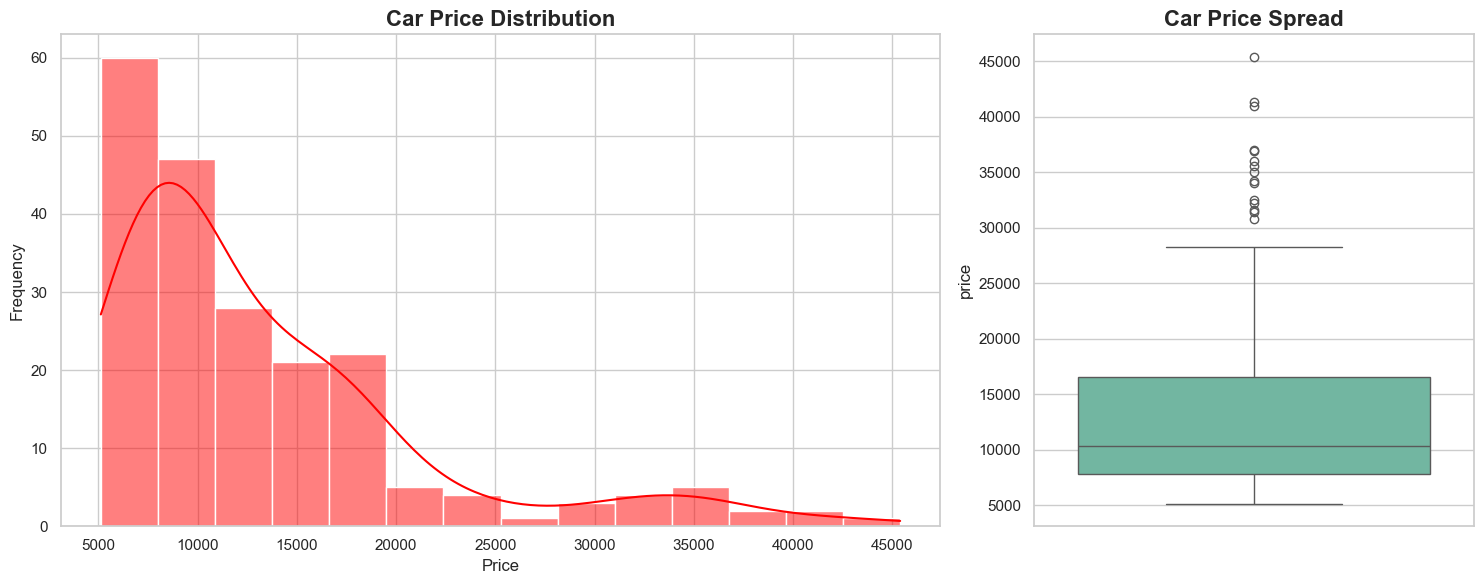

In [21]:
# Set a consistent style for the plots
sns.set_theme(style="whitegrid")

# Create the figure and define a grid layout for subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1]})

# Plot 1: Distribution of car prices
sns.histplot(df["price"], color="red", kde=True, ax=axes[0])
axes[0].set_title("Car Price Distribution", fontweight="bold", fontsize=16)
axes[0].set_xlabel("Price", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Plot 2: Boxplot of car prices
sns.boxplot(y=df["price"], palette="Set2", ax=axes[1])
axes[1].set_title("Car Price Spread", fontweight="bold", fontsize=16)
axes[1].set_xlabel("")

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

In [22]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
price,5118.0,13276.710571,10295.0,45400.0,7988.852332,1.777678


- We can clearly observe that our Car Price Feature is Right Skewed.
- We can clearly observe that there is a significant difference between mean & median value.
- We can also make an insight that most of the car's price is below 14000.
- We can also that the skewness of the car price is above 1.5 which means that the data points are highly spread.

##### Visualizing Total No. of cars sold by different company.

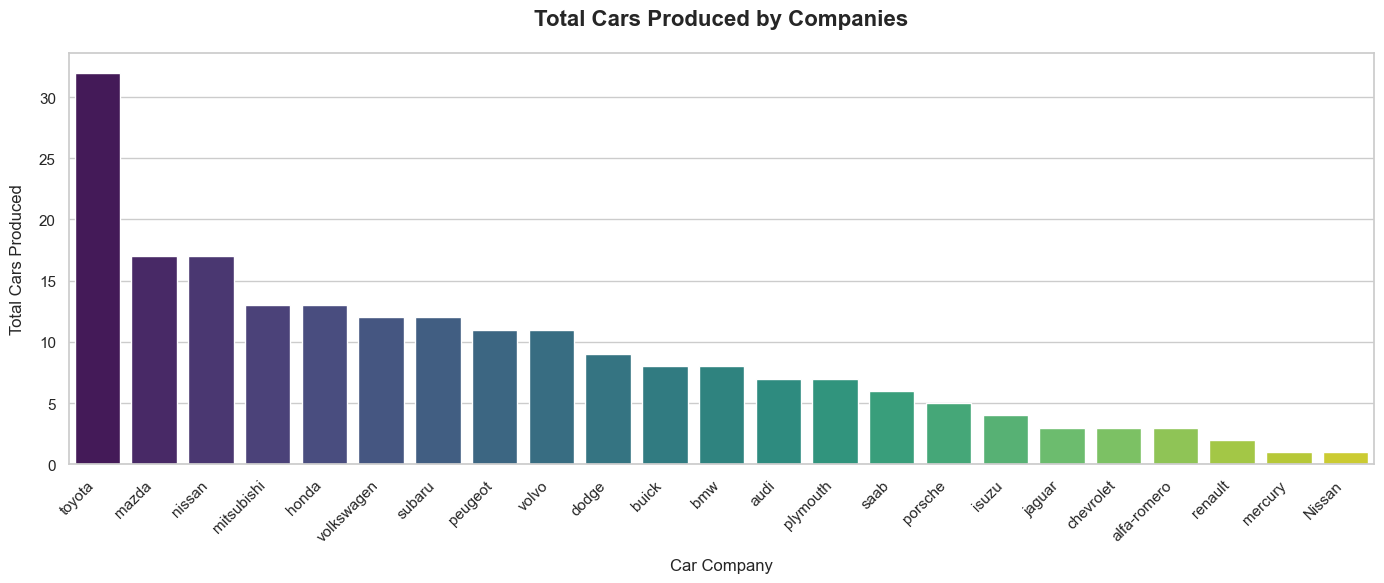

In [23]:
# Set theme for a consistent style
sns.set_theme(style="whitegrid")

# Calculate the counts of cars by company
counts = df["CompanyName"].value_counts()

# Create the figure and plot
plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Add labels and title with consistent formatting
plt.xlabel("Car Company", fontsize=12, labelpad=10)
plt.ylabel("Total Cars Produced", fontsize=12, labelpad=10)
plt.title("Total Cars Produced by Companies", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [24]:
grouped = (df.groupby('CompanyName').size().reset_index(name='Count').sort_values(by='Count', ascending=False))
grouped

,CompanyName,Count
20,toyota,32
13,nissan,17
10,mazda,17
12,mitsubishi,13
7,honda,13
21,volkswagen,12
19,subaru,12
14,peugeot,11
22,volvo,11
6,dodge,9


In [25]:
df[df["CompanyName"]=="mercury"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,76,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [26]:
df[df["CompanyName"]=="Nissan"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
89,90,1,Nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499.0


In [27]:
df[df["CompanyName"]=="renault"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
130,131,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9295.0
131,132,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9895.0


- Toyota company has sold the highest number of cars.
- So we can say that Toyota is kind of customers most favoured company.
- Nisaan ,Mercury or renault are having very low data-points. So we can't make any inference of least sold car companies.

##### Visualizing Car Company w.r.t Price.

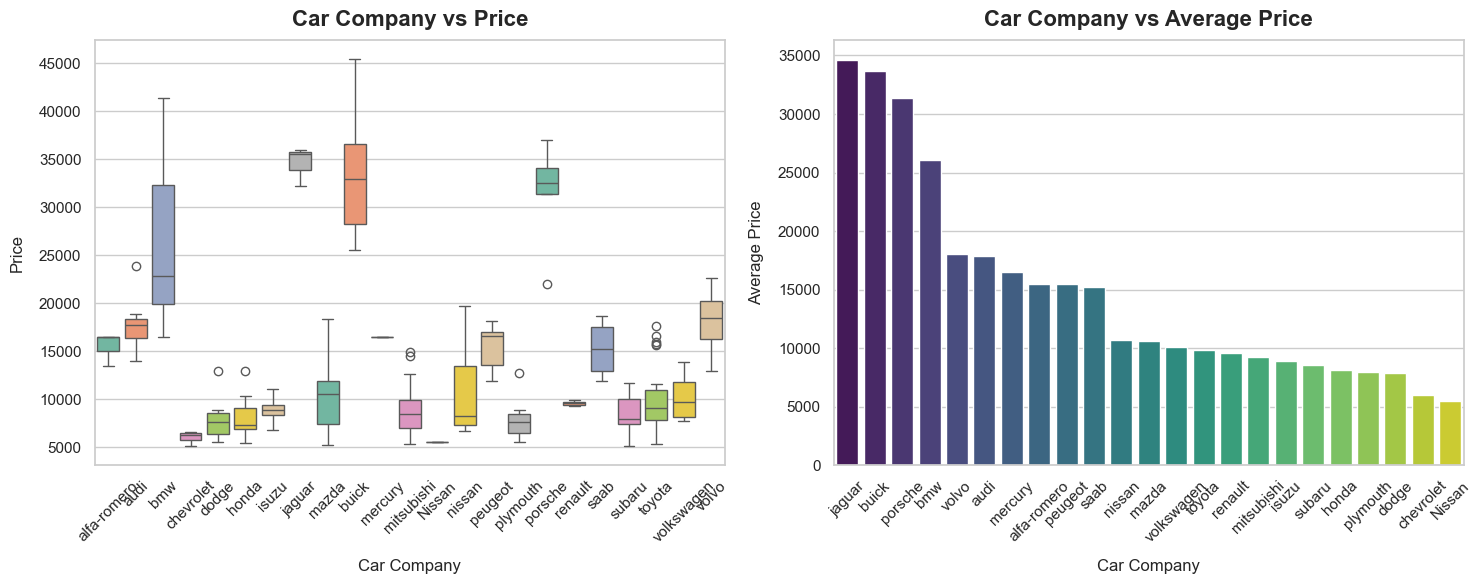

In [28]:
# Set a consistent theme for the plots
sns.set_theme(style="whitegrid")

# Create the figure and define subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 2]})

# Plot 1: Boxplot of Car Company vs Price
sns.boxplot(x="CompanyName", y="price", data=df, ax=axes[0], palette="Set2")
axes[0].set_title("Car Company vs Price", fontweight="bold", fontsize=16, pad=10)
axes[0].set_xlabel("Car Company", fontsize=12, labelpad=10)
axes[0].set_ylabel("Price", fontsize=12, labelpad=10)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Barplot of Car Company vs Average Price
average_prices = df.groupby("CompanyName")["price"].mean().sort_values(ascending=False).reset_index()
sns.barplot(x="CompanyName", y="price", data=average_prices, palette="viridis", ax=axes[1])
axes[1].set_title("Car Company vs Average Price", fontweight="bold", fontsize=16, pad=10)
axes[1].set_xlabel("Car Company", fontsize=12, labelpad=10)
axes[1].set_ylabel("Average Price", fontsize=12, labelpad=10)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

- Jaguar & buick seems to have the highest price range cars.
- Car companies like Nisaan,Renault & Mercury are having only one to two datapoints.
- So we can't make any inference related to lowest price range car companies.

- Since there are too many categories in car compnay feature. So we can derive a new feature Company Price Range which will show the price range as Low Range, Medium Range, High Range.

##### Visualizing Car Fuel Type Feature

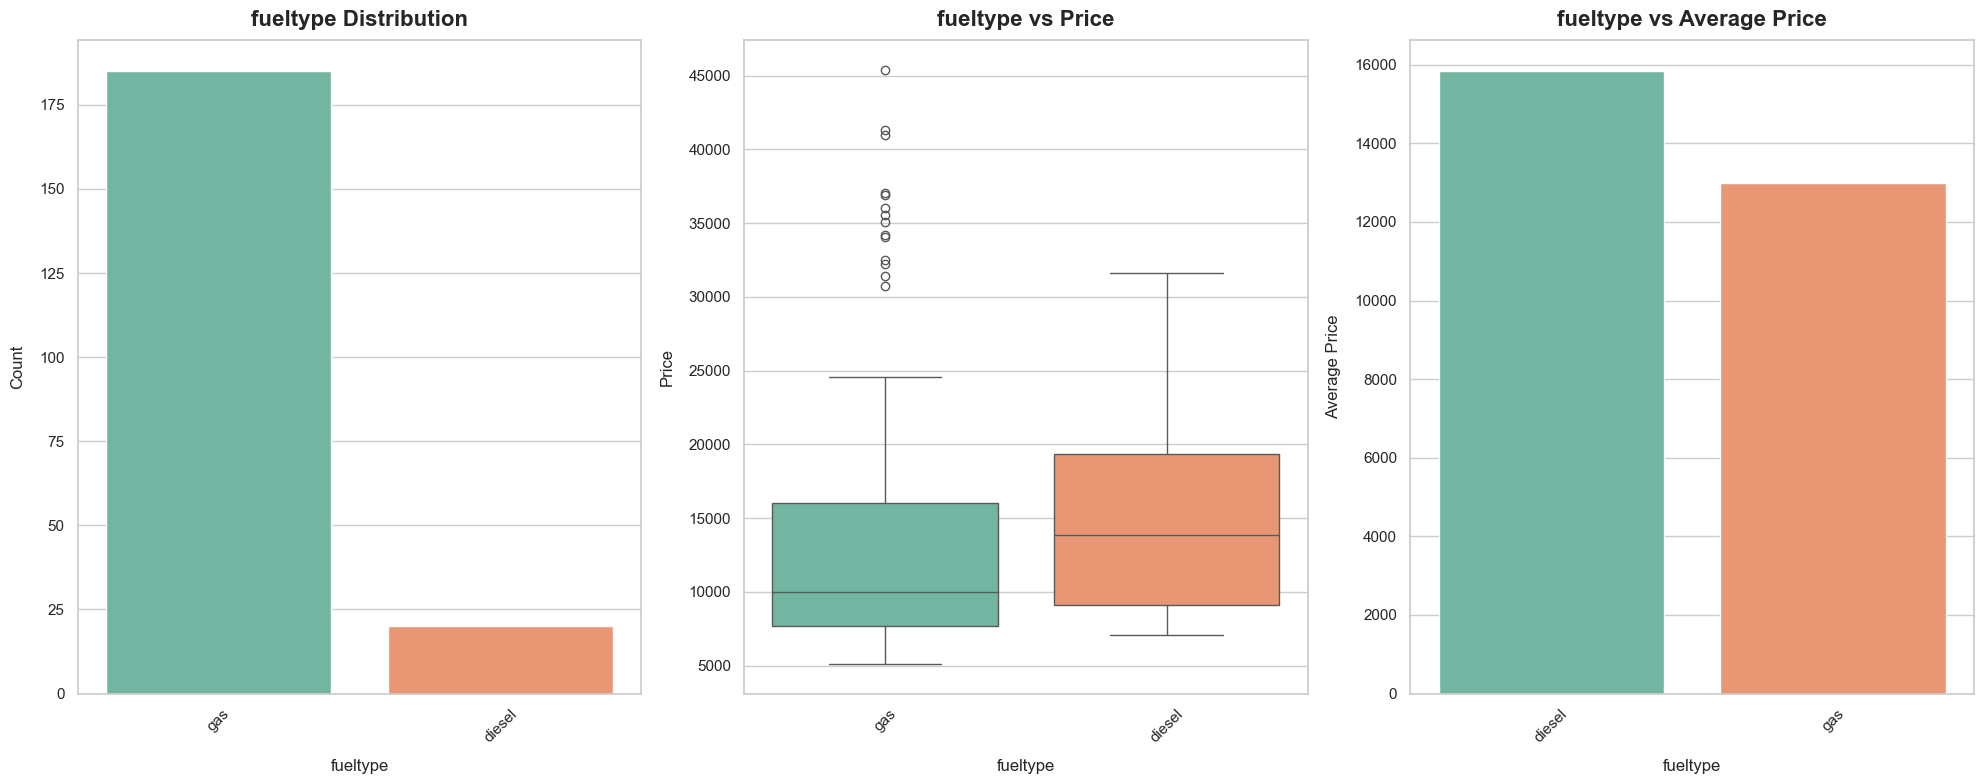

In [29]:
def categorical_visualization(col):
    """
    Visualizes a categorical variable with its distribution, 
    relationship with price, and average price.

    Parameters:
    col (str): The name of the categorical column to visualize.
    """
    # Set a consistent theme for the plots
    sns.set_theme(style="whitegrid")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 8), gridspec_kw={'width_ratios': [2, 2, 2]})

    # Plot 1: Distribution of the categorical variable
    sns.countplot(x=col, data=df, palette="Set2", order=df[col].value_counts().index, ax=axes[0])
    axes[0].set_title(f"{col} Distribution", fontweight="bold", fontsize=16, pad=10)
    axes[0].set_xlabel(col, fontsize=12, labelpad=10)
    axes[0].set_ylabel("Count", fontsize=12, labelpad=10)
    axes[0].tick_params(axis='x', rotation=45)

    # Plot 2: Boxplot of the variable vs Price
    sns.boxplot(x=col, y="price", data=df, palette="Set2", ax=axes[1])
    axes[1].set_title(f"{col} vs Price", fontweight="bold", fontsize=16, pad=10)
    axes[1].set_xlabel(col, fontsize=12, labelpad=10)
    axes[1].set_ylabel("Price", fontsize=12, labelpad=10)
    axes[1].tick_params(axis='x', rotation=45)

    # Plot 3: Average Price by the variable
    avg_price = df.groupby(col)["price"].mean().sort_values(ascending=False).reset_index()
    sns.barplot(x=col, y="price", data=avg_price, palette="Set2", ax=axes[2])
    axes[2].set_title(f"{col} vs Average Price", fontweight="bold", fontsize=16, pad=10)
    axes[2].set_xlabel(col, fontsize=12, labelpad=10)
    axes[2].set_ylabel("Average Price", fontsize=12, labelpad=10)
    axes[2].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
categorical_visualization("fueltype")

- We can clearly make an inisght that Cars having gas fuel system is mostly sold.
- From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.
- Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.
- From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.
- So we can say that customers prefer those cars which consumes less price in fuels.

##### Visualizing Aspiration Feature.

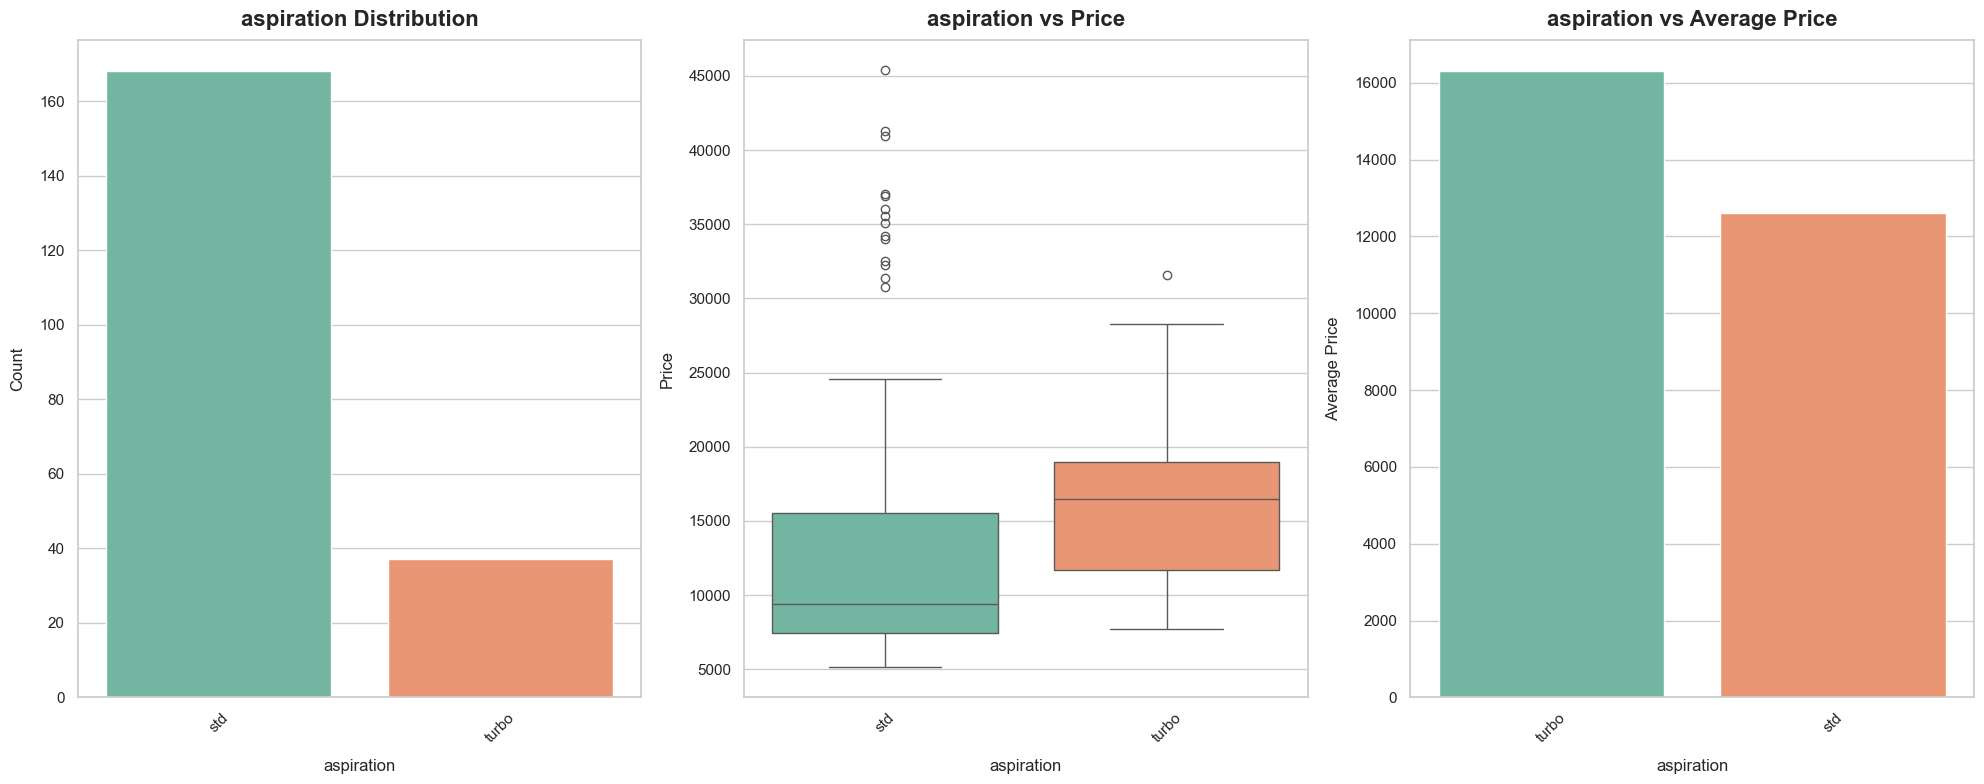

In [30]:
categorical_visualization("aspiration")

- Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.
- Cars having Turbo Aspiration have higher price range than the STD Aspiration.

##### Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.

##### Visualizing Door Nubmer Feature.

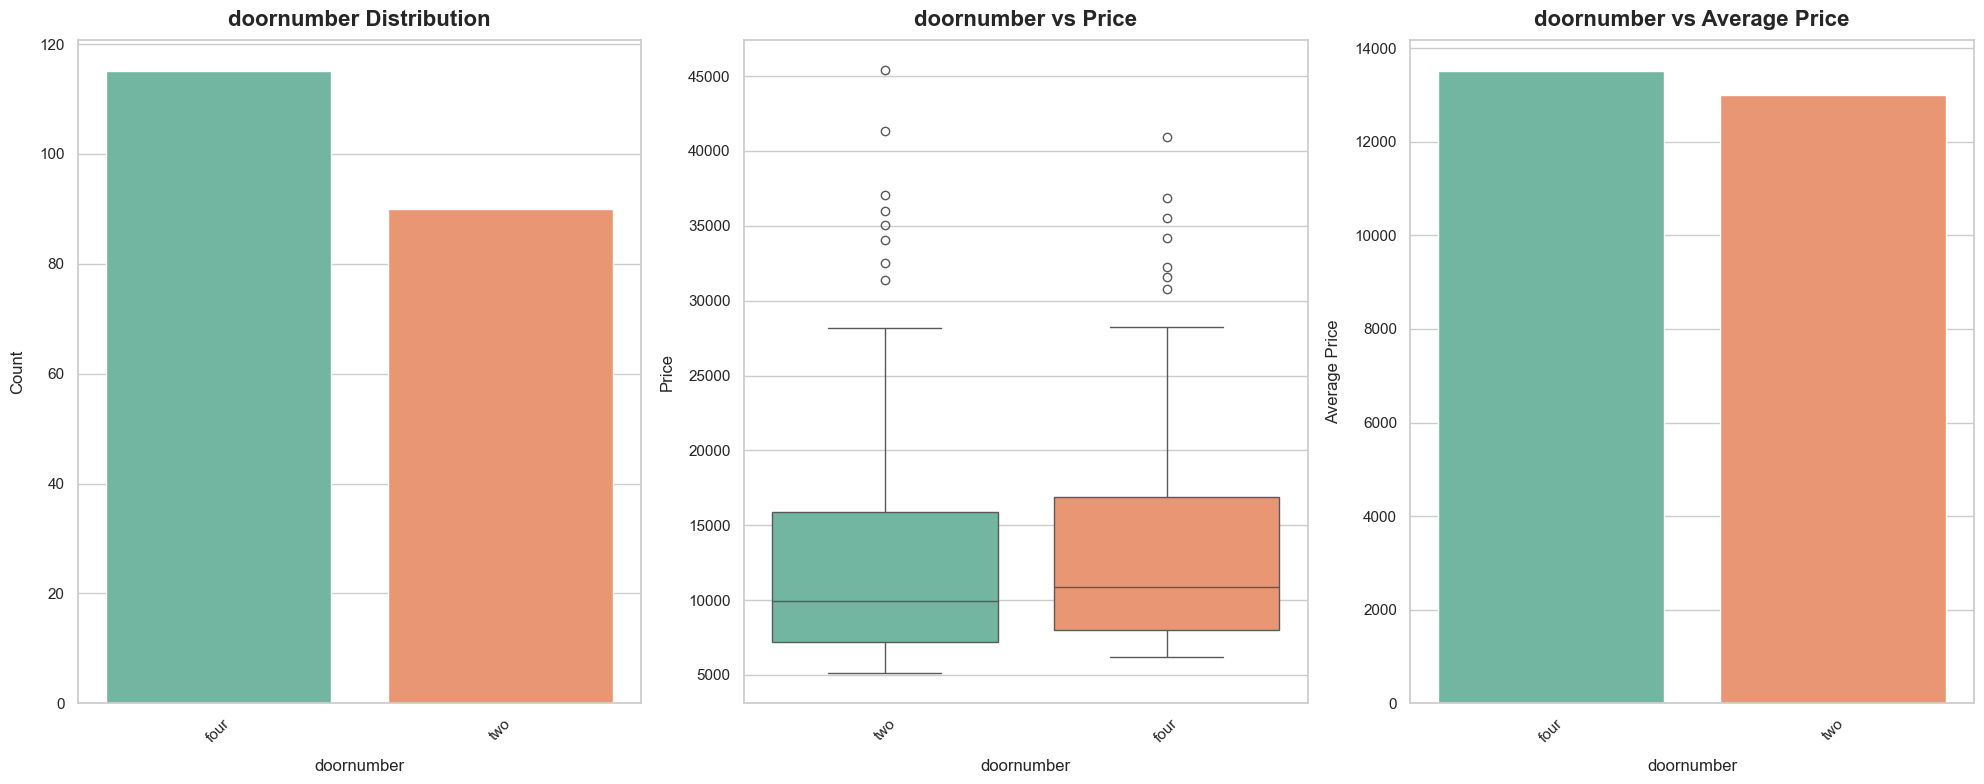

In [31]:
categorical_visualization("doornumber")

- Cars having Four Doors are mostly sold when compared with cars having Two Doors.
- Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.

- Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..
- Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors
- Door numbers category is not affecting the price that much.

##### Visualizing Car Body Type Feature

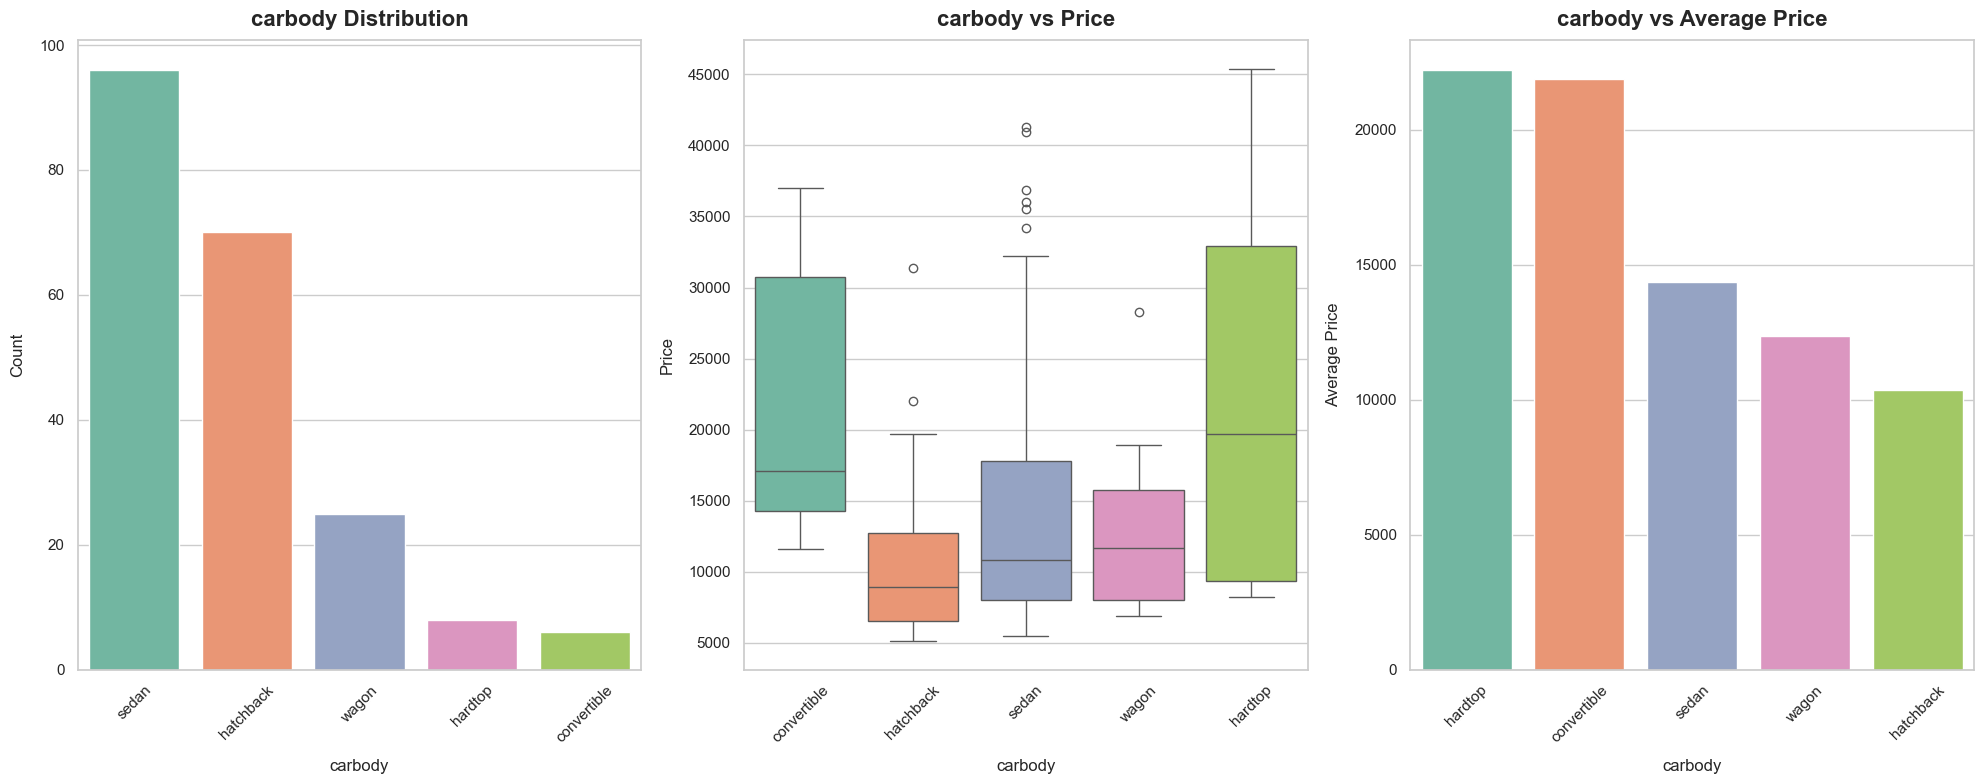

In [32]:
categorical_visualization("carbody")

- Cars having sedan body-type are mostly sold followed by hatchback.
- Cars having convertible or hardtop body-type are less sold.
- Cars having Hardtop body-type is the mostly expensive cars followed by convertible.

- Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
- Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

##### Visualizing Drive Wheel Feature.

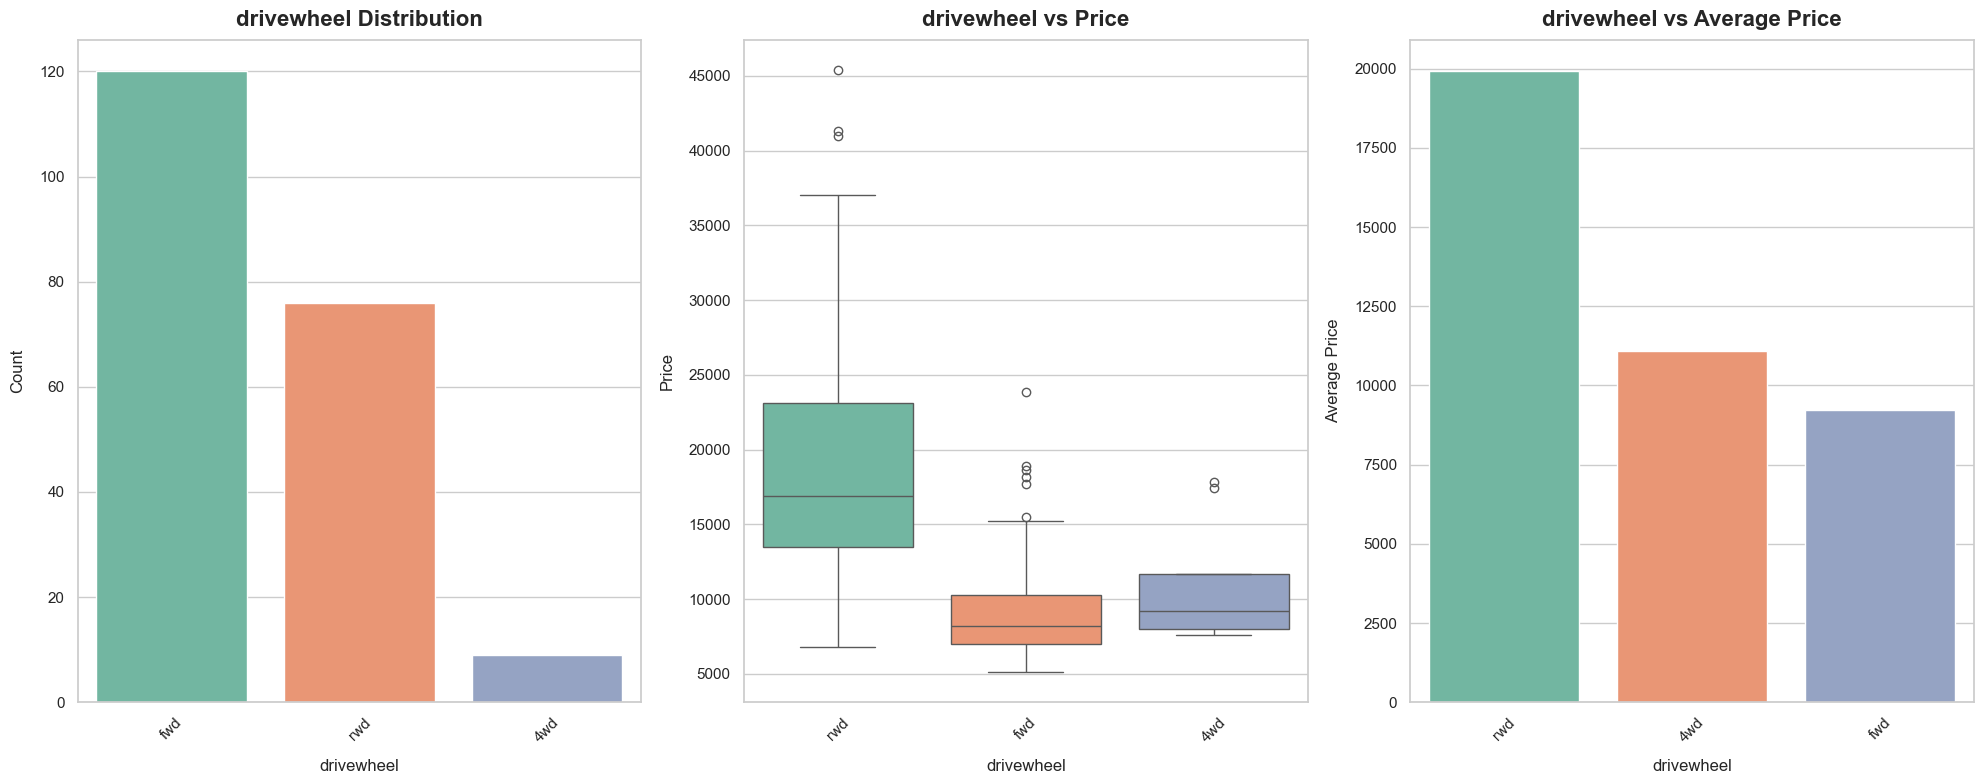

In [33]:
categorical_visualization("drivewheel")

- Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).
- Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

- We can make an insight that the high rated cars must be using Rear Wheel Drive.
- Cars with low prices must be using Forward Wheel Drive

##### Visualizing Engine Location Feature

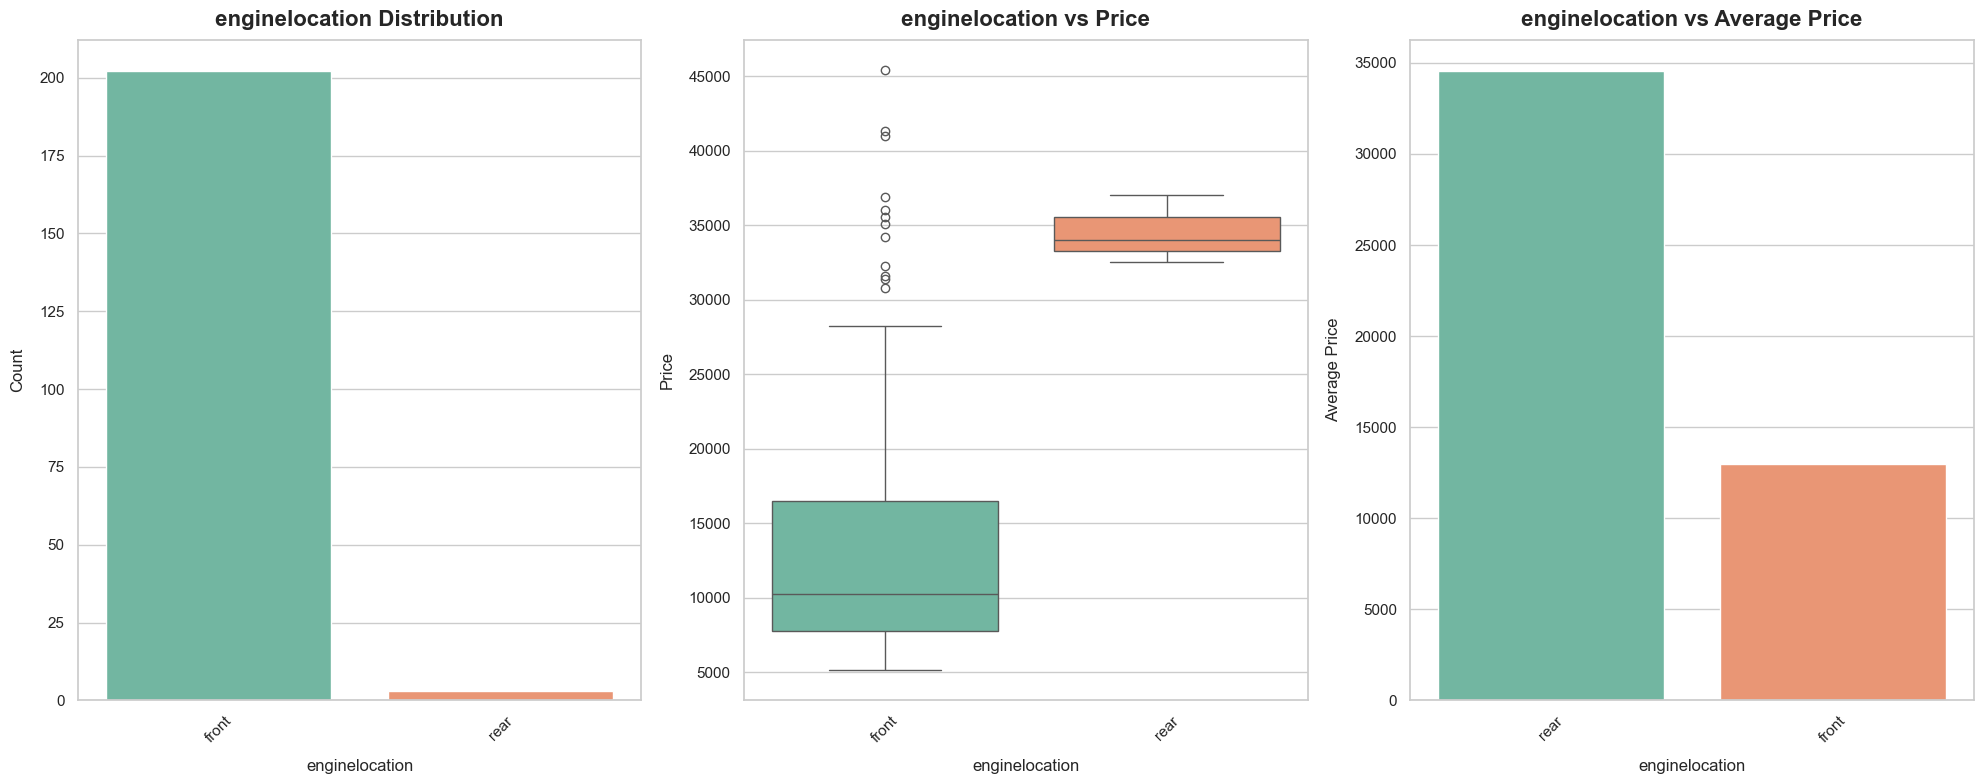

In [34]:
categorical_visualization("enginelocation")

In [35]:
df[df["enginelocation"]=="rear"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,128,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,129,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


- Most of the cars are having engine location in front.

- Note there are only 3 data-points for the rear category.
- So we can't make any inference of car price when compared with engine location.
- If we want we can drop this feature before training as it may lead to overfitting.

##### Visualizing Engine Type Feature.

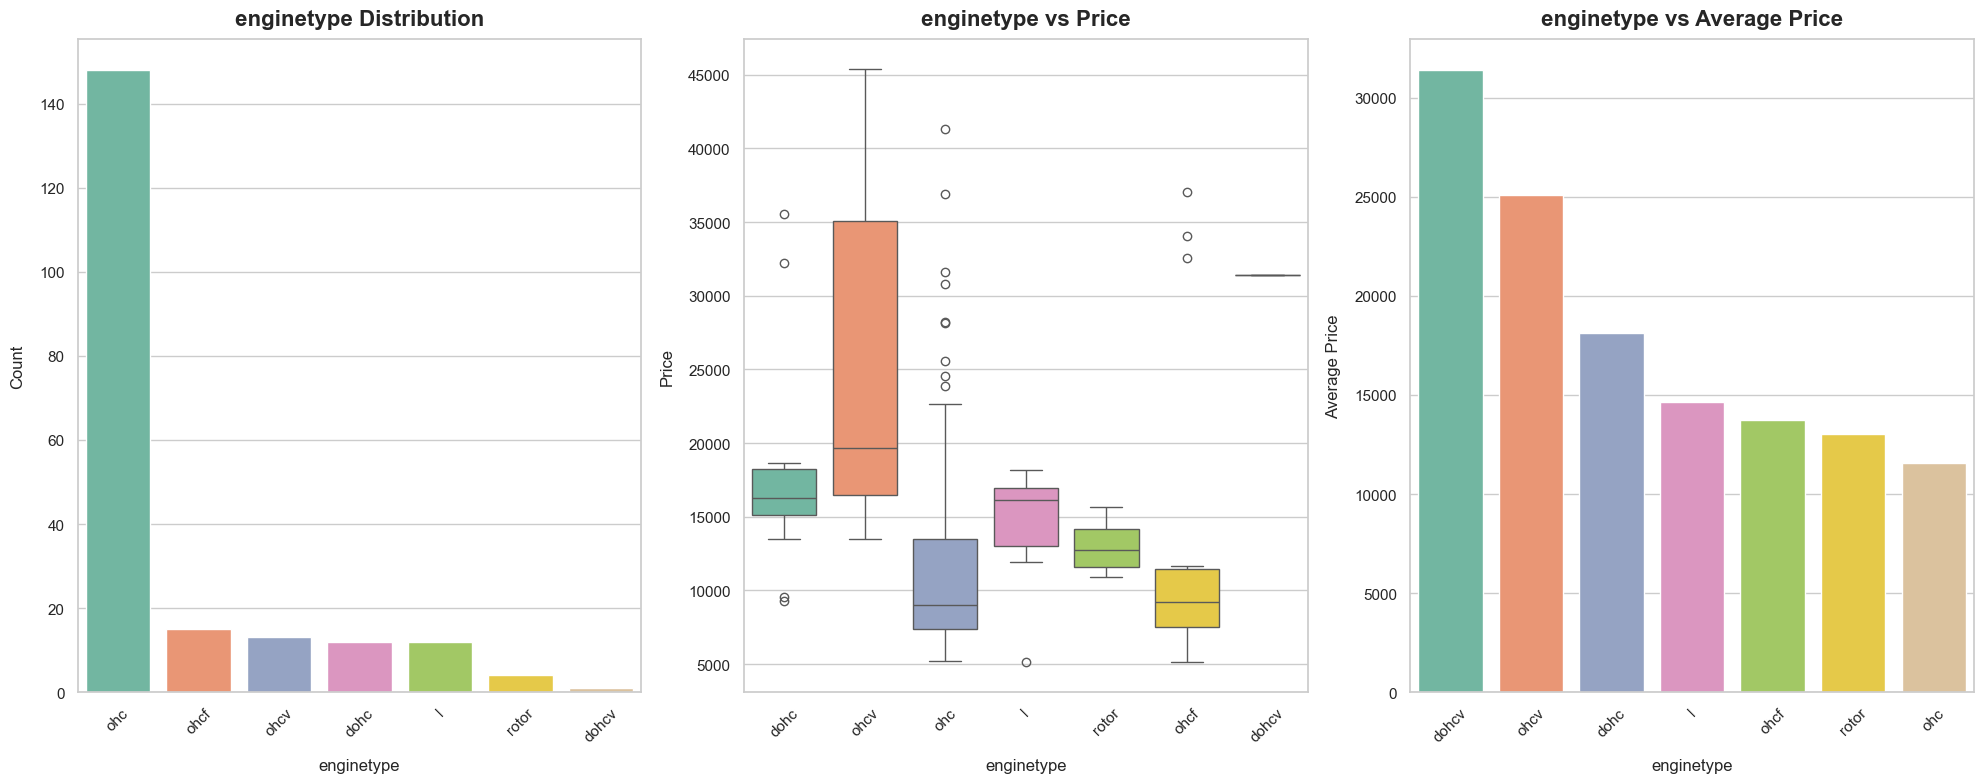

In [36]:
categorical_visualization("enginetype")

In [37]:
df[df["enginetype"]=="dohcv"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [38]:
df[df["enginetype"]=="rotor"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
55,56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
56,57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
57,58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0
58,59,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0


- Cars having Overhead Camshaft (OHC) engines are mostly sold.
- Only one car has been sold having engine type dohcv.
- There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.
- Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.

##### Visualizing Cyclinder Number Feature.

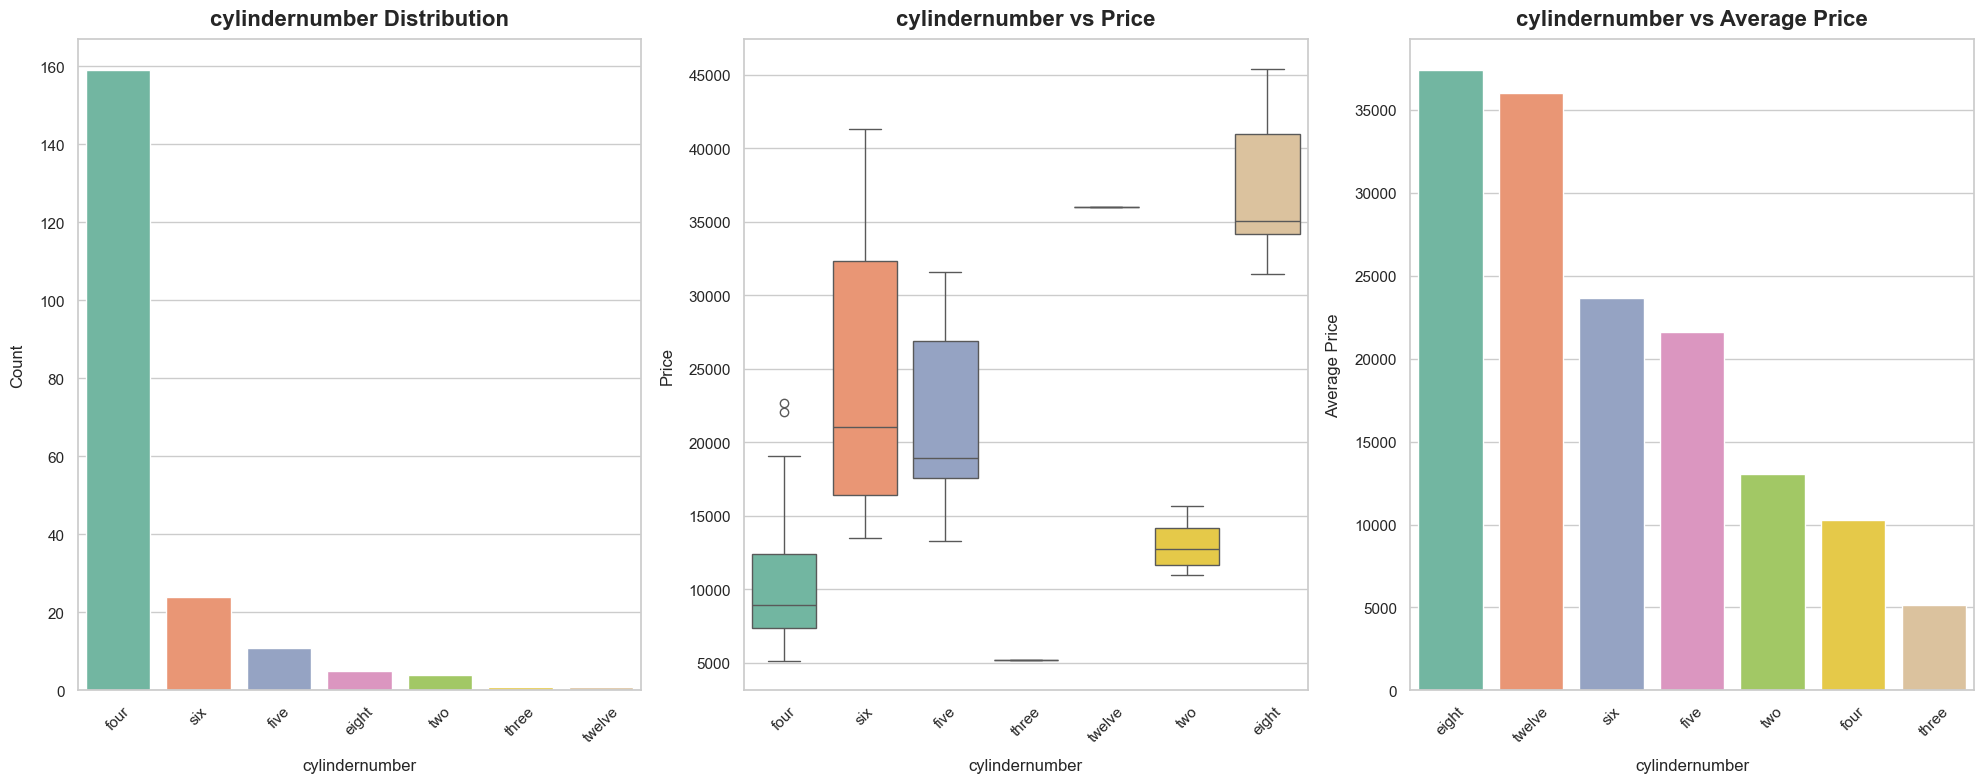

In [39]:
categorical_visualization("cylindernumber")

In [40]:
df[df["cylindernumber"]=="three"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


In [41]:
df[df["cylindernumber"]=="twelve"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


- Most of the cars are having Four cyclinders followed by cars having six cyclinders.
- There are only one data-point each for car having Three & Twelve data-points.
- Cars having eight cyclinders are most expensive cars followed by six cyclinders.

##### Visualizing Fuel System Feature

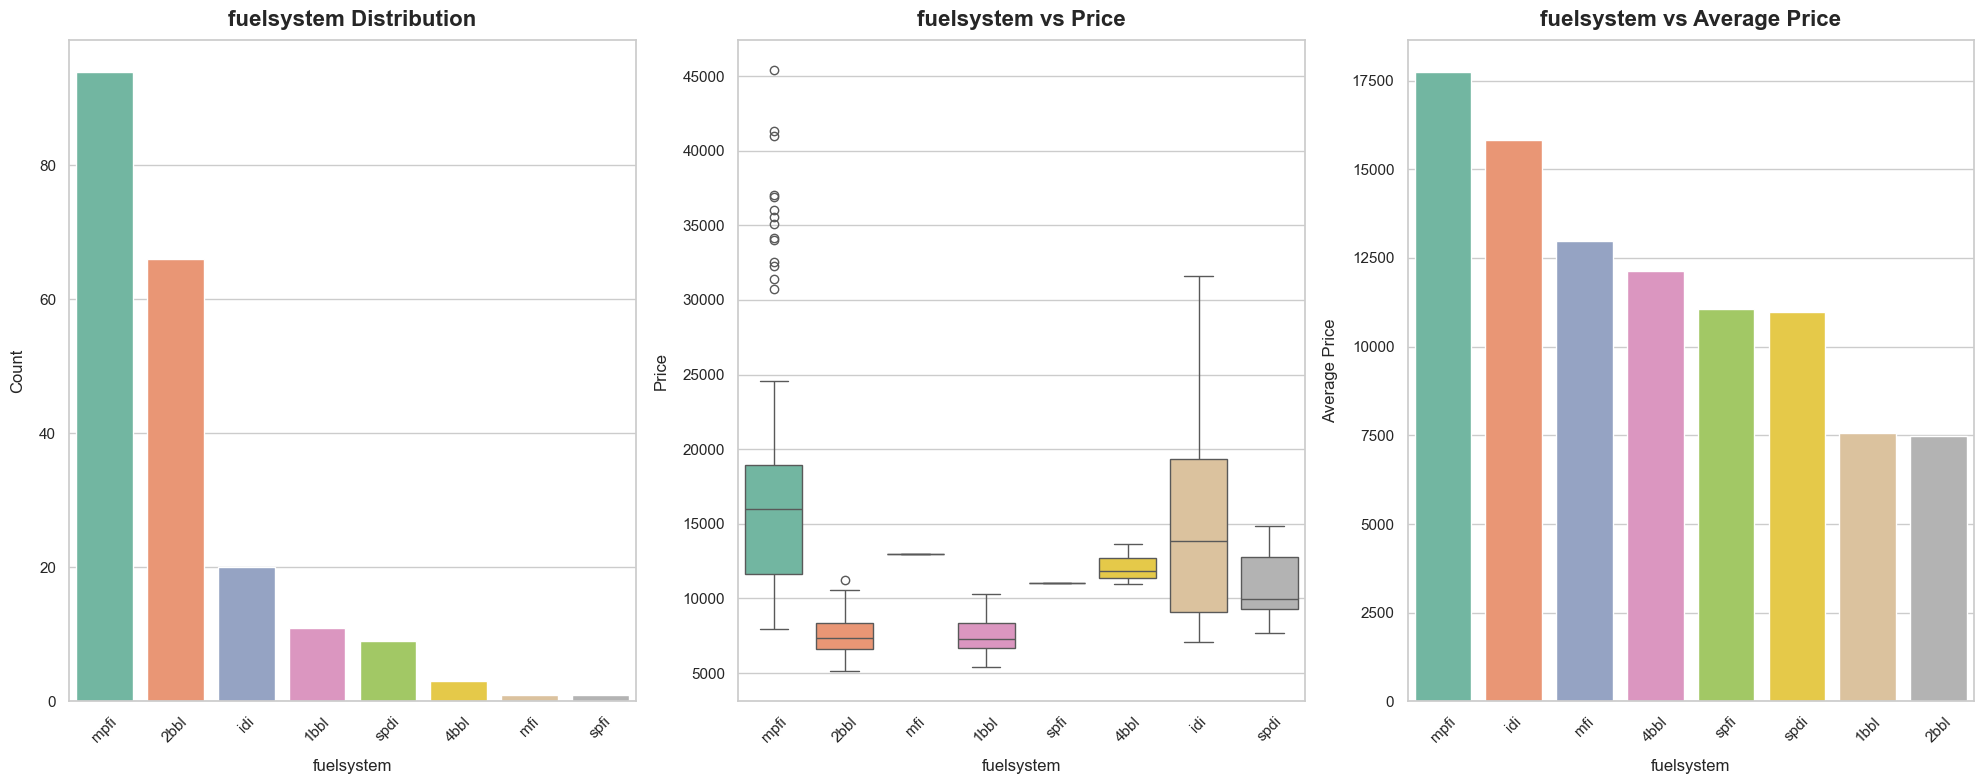

In [42]:
categorical_visualization("fuelsystem")

In [43]:
df[df["fuelsystem"]=="mfi"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [44]:
df[df["fuelsystem"]=="spfi"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
46,47,2,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


- Most of the cars are having mpfi & 2bbl fuelsystems.
- Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
- There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

##### Visualizing Symboling Feature

- The symboling represents the degree to which the car is riskier than its price suggests.
- It ranges from -3 to +3, with higher negative values indicating higher risk and higher positive values indicating lower risk.
- In other words, a car with a symboling of -3 is considered riskier than a car with a symboling of +3, and is likely to have a lower price as a result.

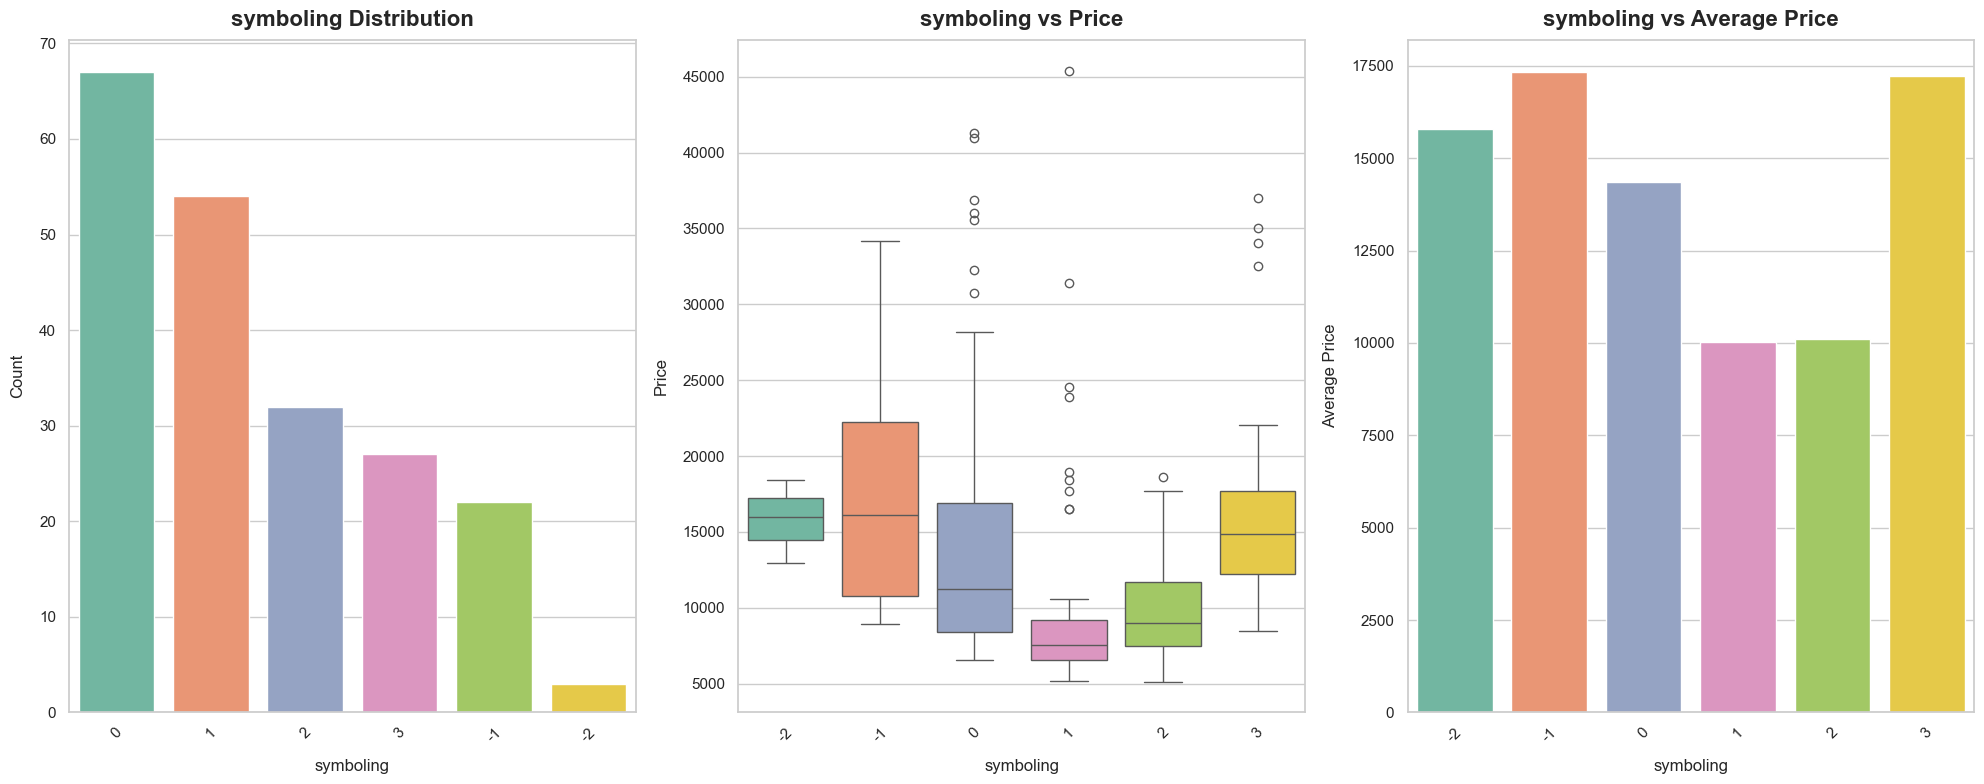

In [45]:
categorical_visualization("symboling")

- We can clearly observe cars having symboling 0 or 1 are motly preferred.
- We can aslo observe that symboling -1, 0, 3 are expensive.

##### Visualizing "CarLength", "CarWidth","Carheight" Features w.r.t "Price"

In [46]:
def scatter_plot(cols):
    """
    Creates scatter plots for multiple numerical columns against price.

    Parameters:
    cols (list): A list of numerical column names to plot against 'price'.
    """
    # Check if all columns in `cols` exist in the DataFrame
    missing_cols = [col for col in cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"The following columns are missing in the DataFrame: {missing_cols}")

    # Set consistent theme
    sns.set_theme(style="whitegrid")

    # Determine layout dynamically
    num_cols = len(cols)
    plt.figure(figsize=(5 * num_cols, 6))

    # Create scatter plots for each column
    for i, col in enumerate(cols, start=1):
        plt.subplot(1, num_cols, i)
        sns.scatterplot(x=col, y="price", data=df, color="blue", alpha=0.7)
        plt.title(f"{col} vs Price", fontweight="bold", fontsize=16, pad=10)
        plt.xlabel(col, fontsize=12, labelpad=10)
        plt.ylabel("Price", fontsize=12, labelpad=10)

    # Adjust layout for spacing
    plt.tight_layout()
    plt.show()

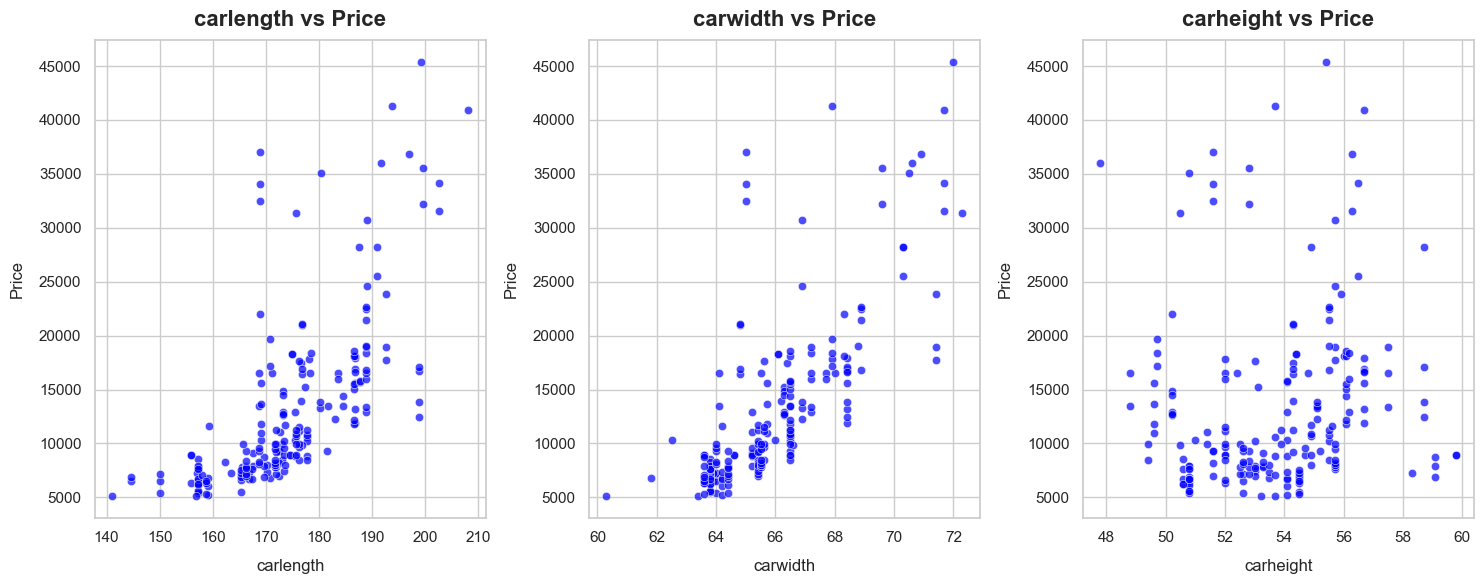

In [47]:
scatter_plot(["carlength", "carwidth", "carheight"])

- We can clearly observe that carlength & carwidth features are highly correlated with the price feature.
- So we can make an insight that with increment in length & width of the car there is an increment in price too.
- From carlength vs price we can't make any inference as the data-points are too scattered.
- Since CarHeight is not affecting Price We can drop this feature.

##### Visualizing "EngineSize","Boreratio" & "Stroke" Features

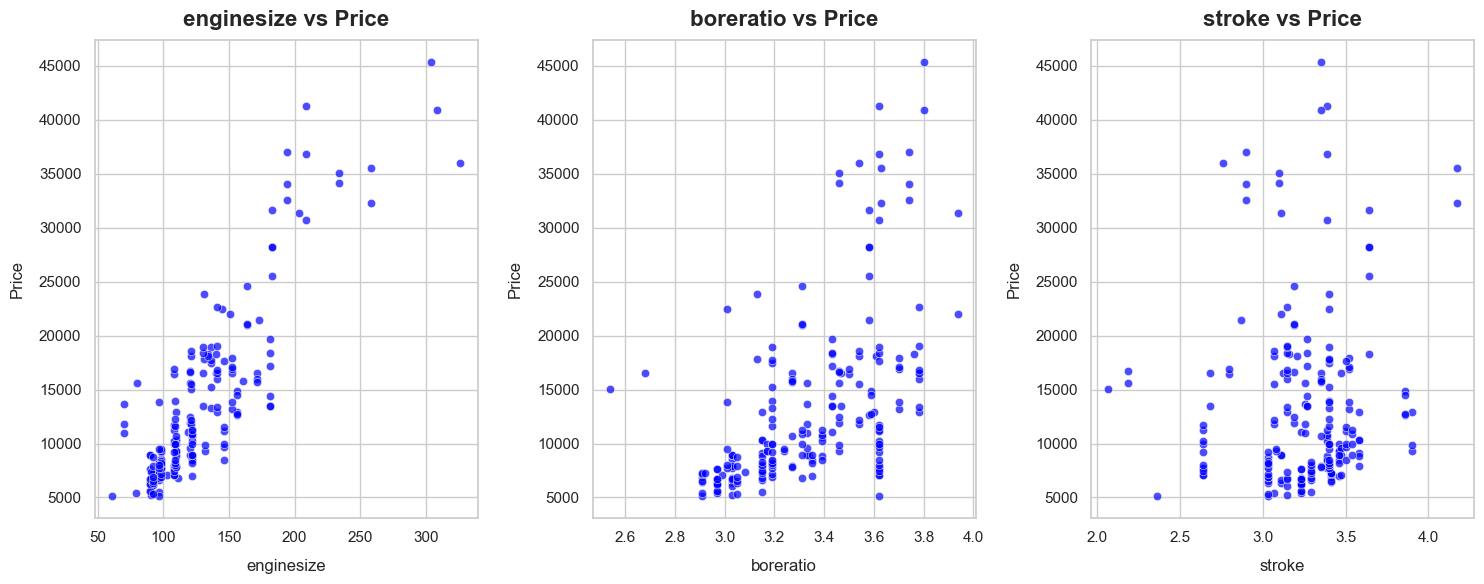

In [48]:
scatter_plot(["enginesize","boreratio","stroke"])

- We can clearly observe that Enginesize is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.
- From Boreratio vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in boreratio the price of cars increases.
- From Stroke vs Price we can't make any inference as the data-points are too scattered.
- Since Stroke is not affecting Price that much. We can drop this feature.

##### Visualizing "Compreessionratio","Horesepower" & "Peakrpm" Features.

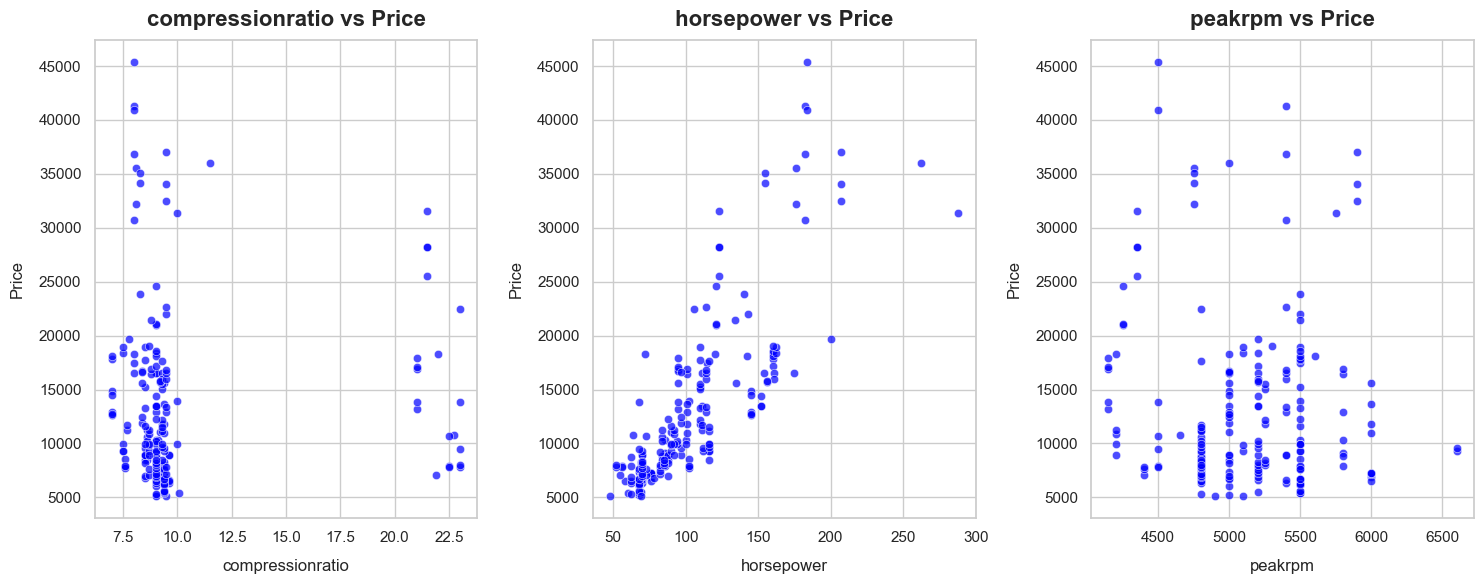

In [49]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

- We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.
- From Compressionratio vs Price & Peakrpm vs Price visuals we can't make any inference as the data-points are too scattered.
- SInce Compressionratio & Peakrpm is not affecting price. So we can drop this features.

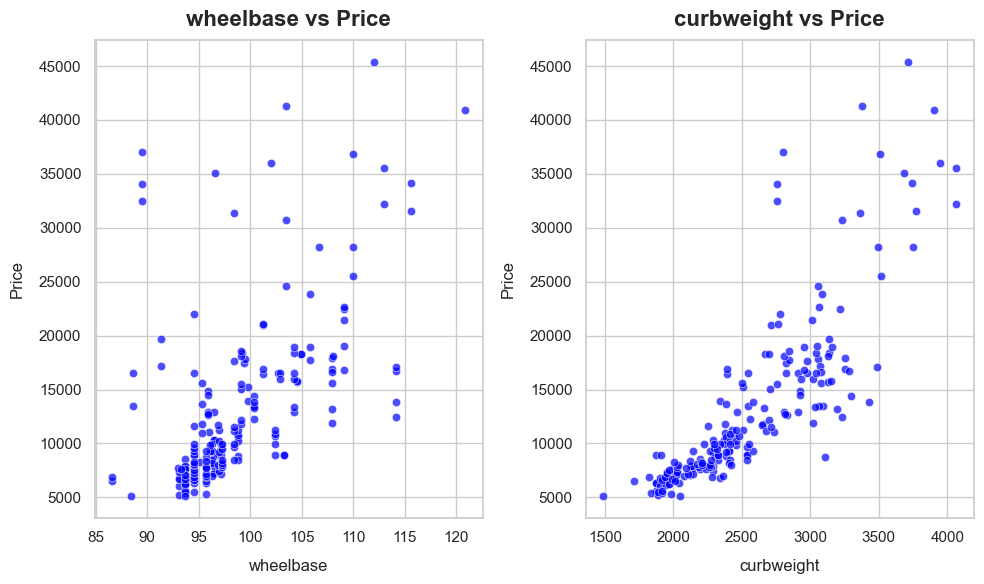

In [50]:
scatter_plot(["wheelbase","curbweight"])

- We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.
- From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases.

##### Visualizing "Citympg" & "Highwaympg" Features.

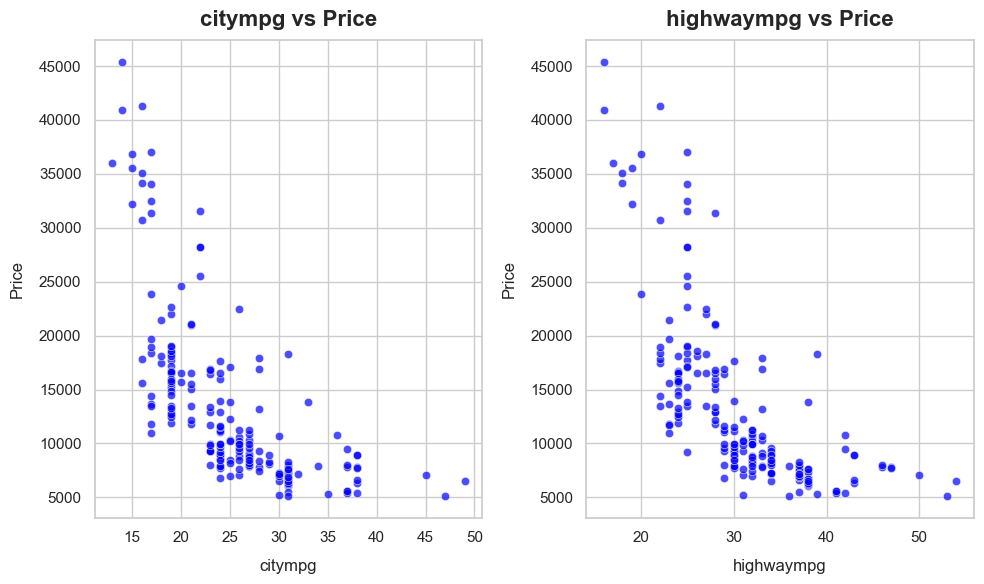

In [51]:
scatter_plot(["citympg","highwaympg"])

- We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.
- So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.
- So our both Citympg & Highwaympg are useful features for price prediction.

##### List of all the useful Features.

**List of all the useful Categorical Features** 

1. CompanyName
2. Fuel Type
3. Aspiration
4. Door Number
5. Car Body
6. Drive Wheel
7. Engine Type
8. Cyclinder Number
9. Fuel System

**List of all he useful Numerical Features.**

1. Wheelbase
2. Carlength
3. Carwidth
4. Curbeweight
5. Enginesize
6. Boreratio
7. Horsepower
8. citympg
9. Highwaympg
10. Price

### Feature Engineering

- Deriving New Features From "Company Name" Feature.
- As we made an insight above that we can split the car company name into different price ranges.Like Low Range, Medium Range, High Range cars.

In [52]:
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z

CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,5499.0,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,10652.88,16503.0,9239.77,10704.88,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


- In above output we fetched the avergae price of each individual car companies
- Now we have to add this average values a new column in our datset.

In [53]:
df = df.merge(z.T,how="left",on="CompanyName")

In [54]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,Medium


In [55]:
df.sample(5)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
26,27,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609.0,7875.44,Budget
24,25,1,dodge,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0,7875.44,Budget
114,115,0,peugeot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3485,l,four,152,idi,3.70,3.52,21.0,95,4150,25,25,17075.0,15489.09,Medium
143,144,0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340,ohcf,four,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960.0,8541.25,Budget
184,185,2,volkswagen,diesel,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2264,ohc,four,97,idi,3.01,3.40,23.0,52,4800,37,46,7995.0,10077.50,Medium


### Data Preprocessiong

##### Creating new DataFrame with all the useful Features

In [56]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]

In [57]:
new_df.sample(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
149,gas,turbo,four,wagon,4wd,ohcf,four,mpfi,96.9,173.6,65.4,2650,108,3.62,111,23,23,11694.0,Budget
31,gas,std,two,hatchback,fwd,ohc,four,1bbl,86.6,144.6,63.9,1819,92,2.91,76,31,38,6855.0,Budget
56,gas,std,two,hatchback,rwd,rotor,two,4bbl,95.3,169.0,65.7,2380,70,3.33,101,17,23,11845.0,Medium
180,gas,std,four,sedan,rwd,dohc,six,mpfi,104.5,187.8,66.5,3131,171,3.27,156,20,24,15690.0,Budget
37,gas,std,two,hatchback,fwd,ohc,four,1bbl,96.5,167.5,65.2,2236,110,3.15,86,27,33,7895.0,Budget


##### Creating Dummies Variables for all the Categorical Features.

In [58]:
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df)

In [59]:
boolean_cols_auto = new_df.select_dtypes(include=['bool']).columns
new_df[boolean_cols_auto] = new_df[boolean_cols_auto].astype(int)

In [60]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


##### Selecting Features & Labels for Model Training & Testing.

In [61]:
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [62]:
x.shape

(205, 48)

In [63]:
y.shape

(205,)

##### Splitting Data for Model Traning & Testing.

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
print("x_train - >  ",x_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (164, 48)
x_test  - >   (41, 48)
y_train - >   (164,)
y_test  - >   (41,)


##### Feature Scaling

In [66]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Model Building

In [67]:
training_score = []
testing_score = []

In [68]:
def model_prediction(model,x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is :",b)

### Linear-Regression Model

In [69]:
model_prediction(LinearRegression(),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of LinearRegression() model on Training Data is: 96.0384799952984
r2_Score of LinearRegression() model on Testing Data is : 88.21984633141562


### Ridge Model

In [70]:
model_prediction(Ridge(alpha=1.0),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of Ridge() model on Training Data is: 96.01791796095362
r2_Score of Ridge() model on Testing Data is : 88.42283095165857


### Lassso Model

In [71]:
model_prediction(Lasso(alpha=0.1),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of Lasso(alpha=0.1) model on Training Data is: 96.03847410060665
r2_Score of Lasso(alpha=0.1) model on Testing Data is : 87.98817922977456


### ElasticNet Model 

In [72]:
model_prediction(ElasticNet(alpha=0.1, l1_ratio=0.5),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of ElasticNet(alpha=0.1) model on Training Data is: 95.62254383206759
r2_Score of ElasticNet(alpha=0.1) model on Testing Data is : 88.71736904457187


### Decision-Tree-Regressor Model

In [73]:
model_prediction(DecisionTreeRegressor(),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is : 91.38343895813634


### Random-Forest-Regressor Model

In [74]:
model_prediction(RandomForestRegressor(),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of RandomForestRegressor() model on Training Data is: 98.72247124144288
r2_Score of RandomForestRegressor() model on Testing Data is : 95.73133270598767


### Ada-Boost-Regressor Model

In [75]:
model_prediction(AdaBoostRegressor(),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of AdaBoostRegressor() model on Training Data is: 96.33205259130537
r2_Score of AdaBoostRegressor() model on Testing Data is : 92.1541240124499


### Gradient-Boosting-Regressor Model

In [76]:
model_prediction(GradientBoostingRegressor(),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.37237309193023
r2_Score of GradientBoostingRegressor() model on Testing Data is : 92.28212757782582


### LGMB Regressor Model

In [77]:
model_prediction(LGBMRegressor(),x_train_scaled,x_test_scaled,y_train,y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 24
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

### XGBRegressor Model

In [78]:
model_prediction(XGBRegressor(),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 99.86532176885409
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_

### Cat-Boost-Regressor Model

In [79]:
model_prediction(CatBoostRegressor(verbose=False),x_train_scaled,x_test_scaled,y_train,y_test)

r2_Score of <catboost.core.CatBoostRegressor object at 0x000001B43A30D8E0> model on Training Data is: 99.7086556035143
r2_Score of <catboost.core.CatBoostRegressor object at 0x000001B43A30D8E0> model on Testing Data is : 94.01252203857477


### All Model Performance Comparison

In [80]:
models = ["Linear Regression","Ridge","Lasso","ElasticNet","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [81]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [82]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,96.038480,88.219846
1,Ridge,96.017918,88.422831
2,Lasso,96.038474,87.988179
3,ElasticNet,95.622544,88.717369
4,Decision Tree,99.865371,91.383439
5,Random Forest,98.722471,95.731333
6,Ada Boost,96.332053,92.154124
7,Gradient Boost,99.372373,92.282128
8,LGBM,96.224248,88.739666
9,XGBoost,99.865322,92.664564


Text(0, 0.5, 'Scores')

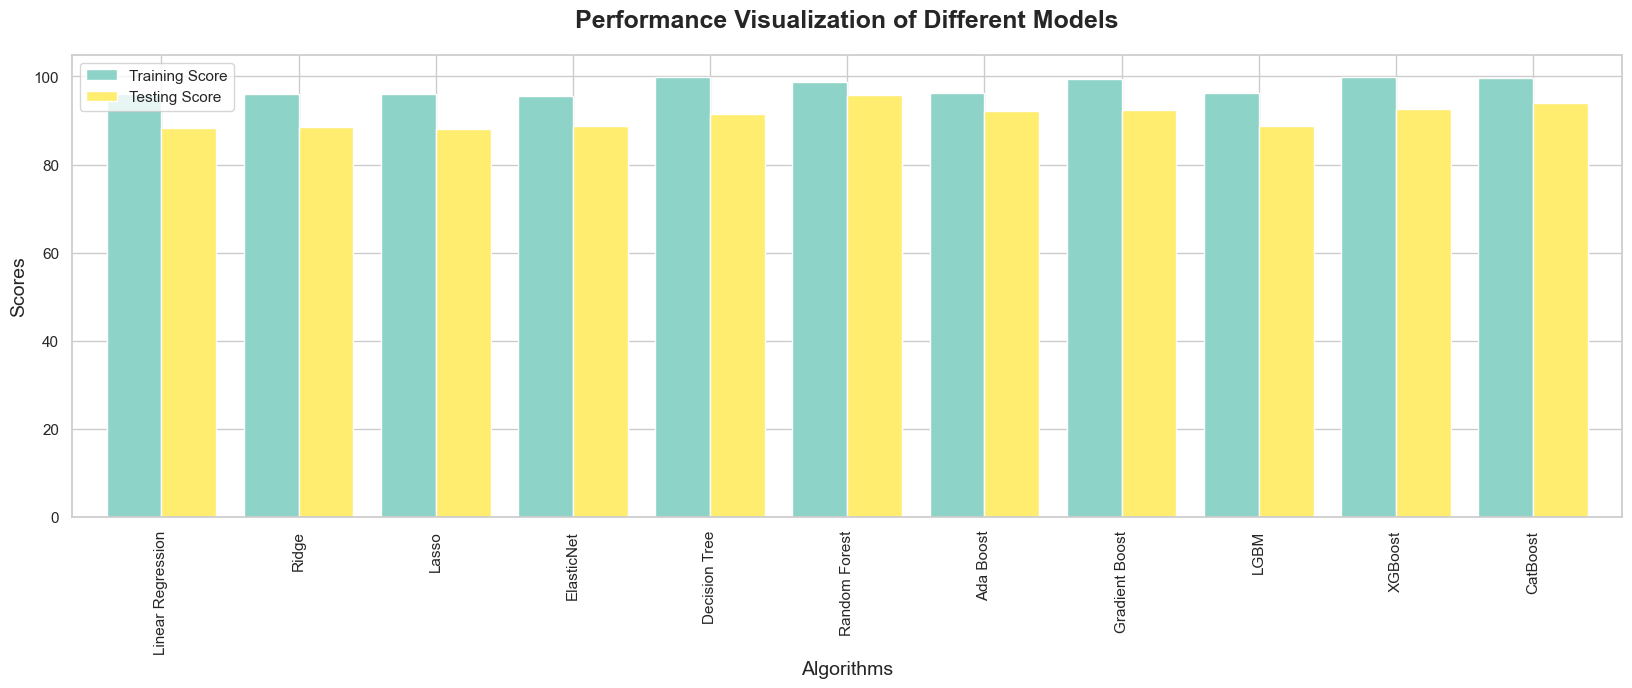

In [83]:
# Plotting bar chart for training and testing scores
df.plot(x="Algorithms", 
        y=["Training Score", "Testing Score"], 
        kind="bar", 
        figsize=(20, 6), 
        colormap="Set3", 
        width=0.8)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Scores", fontsize=14)

- Highest performance was give by Random Forest Model around 95%%.
- But catboost & XGBoost Model performance was also good.
- So we can use any of these three Models for predicting the price of car in future.